# AUTO-ARIMA MODEL

## PHASE I: DATA PRE - PROCESSING

In [37]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
# Importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime

# AUTO-ARIMA
from pyramid.arima import auto_arima

#Plotly
import plotly.plotly as py
import plotly.graph_objs as go

#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

In [39]:
# Loading the whole dataset and setting Date column as an index

dataset = pd.read_csv(r'C:\Users\Pamela\Desktop\PROJECT\DATASET NASDAQ 100\nasdaq100_joined_closes.csv', index_col=0)


In [40]:
# Explore the whole Dataset
dataset.head()
dataset.shape

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AAL,AMGN,...,VRSN,VRSK,VRTX,WBA,WDC,WLTW,WDAY,WYNN,XEL,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
04/01/2010,10.193225,37.090000,9.70,24.125000,18.50,313.688690,311.349976,133.899994,4.557168,48.350658,...,21.007998,29.792044,44.240002,30.470020,37.029556,63.170490,NaN,46.595161,14.790739,20.349150
05/01/2010,10.211267,37.700001,9.71,23.780001,18.01,312.307312,309.978882,134.690002,5.073073,47.931801,...,21.228777,29.991653,42.779999,30.224958,38.011318,63.028927,NaN,49.429043,14.615329,20.092579
06/01/2010,10.157144,37.619999,9.57,23.840000,17.48,304.434448,302.164703,132.250000,4.862889,47.571617,...,20.999506,30.380898,42.029999,29.996222,38.044056,64.043610,NaN,48.780678,14.643392,19.956280
07/01/2010,9.913588,36.889999,9.47,23.930000,17.43,297.347351,295.130463,130.000000,5.006195,47.136017,...,20.710794,30.330994,41.500000,30.175928,37.299545,63.854847,NaN,49.822430,14.580243,19.755833
08/01/2010,9.832404,36.689999,9.43,23.975000,17.66,301.311310,299.064880,133.520004,4.910658,47.554852,...,20.872135,29.941751,40.669998,30.216782,37.487709,63.784065,NaN,49.465473,14.587262,20.044474


(2335, 100)

In [41]:
dataset_1 = dataset.iloc[0:, 7:8]
dataset_1.head()
dataset_1.shape

,AMZN
Date,
04/01/2010,133.899994
05/01/2010,134.690002
06/01/2010,132.250000
07/01/2010,130.000000
08/01/2010,133.520004


(2335, 1)

######  DATASET VISUALIZATION

In [42]:
trace_one = go.Scatter(
      x = dataset_1.index,
      y = dataset_1['AMZN'],
   name = "Amazon AdJ. Close",
   line = dict(color='#17BECF'))

data = [trace_one]

layout = dict(title = '100 NASDAQ - AMAZON',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Adj Close'))

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [43]:
dataset_f = dataset_1.iloc[1258:]

In [44]:
dataset_f.head()
dataset_f.shape

,AMZN
Date,
02/01/2015,308.519989
05/01/2015,302.190002
06/01/2015,295.290008
07/01/2015,298.420013
08/01/2015,300.459992


(1077, 1)

In [45]:
#Dividing the dataset between training and testing datasets and selecting our target which is 
training_set = dataset_f.iloc[0:1063]
testing_set = dataset_f.iloc [1063:]


pandas.core.frame.DataFrame

(1063, 1)

,AMZN
Date,
02/01/2015,308.519989
05/01/2015,302.190002
06/01/2015,295.290008
07/01/2015,298.420013
08/01/2015,300.459992


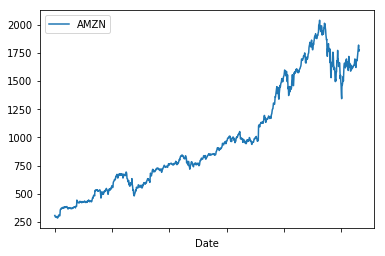

In [46]:
# Exploring 'training_set'
type (training_set)
training_set.shape
training_set.head()
training_set.plot()

pandas.core.frame.DataFrame

(14, 1)

14

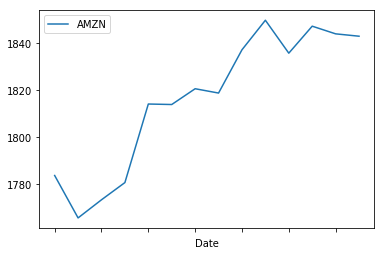

In [47]:
# Exploring'testing_set'
type (testing_set)
testing_set.shape
len(testing_set)
testing_set.plot()

# # PHASE 4: TRAINING MODEL

## DECOMPOSITION
### Deconstrucs a time series: Trend, Seasonal, Residual

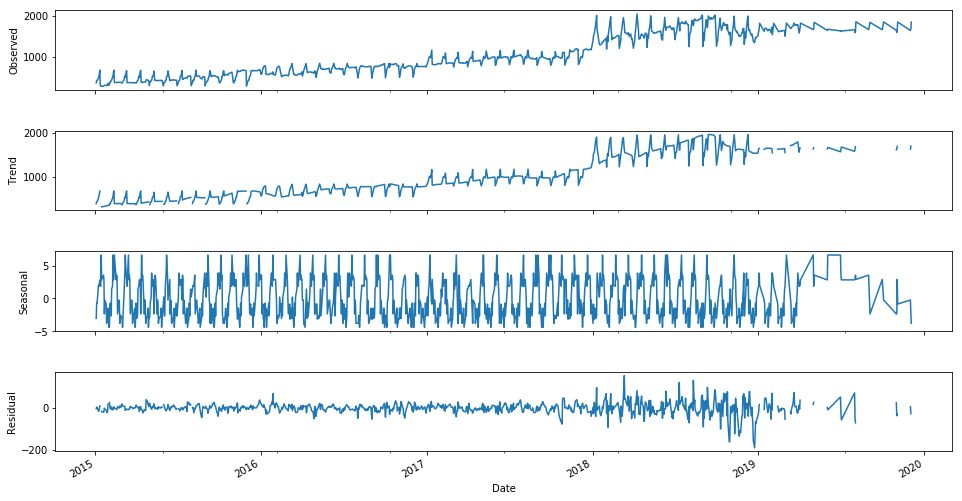

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

dataset_f.index = pd.to_datetime(dataset_f.index)
result = seasonal_decompose(dataset_f, freq=20)
fig = result.plot()
fig.set_size_inches(15,8)


##  BUILDING THE MODEL

In [49]:
Arima_model = auto_arima(training_set, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0,start_Q=0, seasonal=True,d=1, D=1,
                         trace=True, error_action='ignore',suppress_warnings=True, 
                         )


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=10164.361, BIC=10184.187, Fit time=1.607 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=10161.949, BIC=10171.863, Fit time=0.179 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=9912.891, BIC=9932.717, Fit time=3.488 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9504.894, BIC=9524.720, Fit time=5.216 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=9506.670, BIC=9531.452, Fit time=6.531 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=10162.978, BIC=10177.848, Fit time=0.458 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=9506.610, BIC=9531.392, Fit time=43.173 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=9508.853, BIC=9538.592, Fit time=19.991 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9504.544, BIC=9529.326, Fit time=10.069 seconds
Fit ARIMA: order=(1

In [57]:
print(Arima_model.aic())

9502.52863360003


In [58]:
print(Arima_model.summary())


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1063
Model:             SARIMAX(0, 1, 0)x(1, 1, 2, 12)   Log Likelihood               -4746.264
Date:                            Sun, 09 Jun 2019   AIC                           9502.529
Time:                                    23:07:16   BIC                           9527.311
Sample:                                         0   HQIC                          9511.925
                                           - 1063                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0131      0.033      0.393      0.694      -0.052       0.078
ar.S.L12      -0.7097      0.166   

In [59]:
# Fitting the model
Arima_model.fit(training_set)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

# # PHASE 5: TESTING AND EVALUATION
## FORECASTING

In [60]:
forecasting = Arima_model.predict(n_periods=len(testing_set))
type(forecasting)

#Converting numpy array to DataFrame in order to plot in the next step 
forecasting = pd.DataFrame(forecasting, index = testing_set.index,columns=['Prediction'])
type(forecasting)
#forecast = pd.DataFrame(forecast,columns=['Prediction'])

numpy.ndarray

pandas.core.frame.DataFrame

###### PREDICTION VISUALIZATION

In [61]:
#plot and compare the prediction
trace_1 = go.Scatter(x = training_set.index, y=training_set, mode = 'lines', name ='Training')
trace_2 = go.Scatter(x = testing_set.index, y=testing_set, mode = 'lines', name = 'Testing')
trace_3 = go.Scatter(x = testing_set.index, y=forecasting, mode = 'lines', name = 'Prediction')

data = [trace_1, trace_2, trace_3]
layout = dict(title = 'Amazon Stock Market Prediction',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Adj Close'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='ARIMA7')

In [62]:
# Visualising just the prediction

#plot and compare the predictions
trace_testing = go.Scatter(x = testing_set.index, y=testing_set, mode = 'lines', name = 'Real Amazon Stock Price')
trace_forecasting = go.Scatter(x = testing_set.index, y=forecasting, mode = 'lines', name = 'Predicted Amazon Stock Price')

data = [trace_testing, trace_forecasting]
layout = dict(title = 'Amazon Stock Market Prediction',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Adj Close'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='ARIMA7')



In [63]:

rmse = sqrt(mean_squared_error(testing_set,forecasting))
print(rmse)



30.363346985927723
